In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math

In [2]:
data = np.array([[12, 21, 30, 40, 50, 60, 67, 79],
                [0.180, 0.192, 0.229, 0.295, 0.349, 0.530, 0.933, 1.590]])

In [3]:
def r_perp (theta_deg, nt):
    thetai = theta_deg*math.pi/180
    return np.abs((np.cos(thetai)-nt*np.sqrt(1-((1/nt)*np.sin(thetai)**2)))/(np.cos(thetai)+nt*np.sqrt(1-((1/nt)*np.sin(thetai)**2))))**2

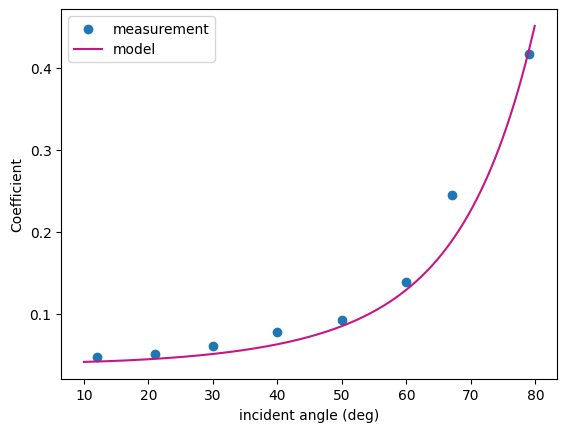

In [4]:
plt.scatter(data[0], data[1]/3.812, label="measurement")
# plt.plot(data[0], data[1]/3.812)

x = np.arange(10, 80, 0.1)
plt.plot(x, r_perp(x, 1.5), c="mediumvioletred", label="model")

plt.ylabel("Coefficient")
plt.xlabel("incident angle (deg)")
plt.legend()

plt.show()

In [5]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(r_perp, data[0], data[1]/3.812, p0=1.5)

In [6]:
popt

array([1.55048965])

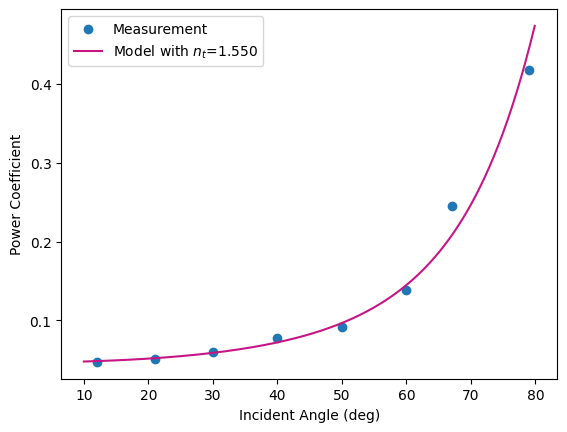

In [8]:
plt.scatter(data[0], data[1]/3.812, label="Measurement")
# plt.plot(data[0], data[1]/3.812)

x = np.arange(10, 80, 0.1)
plt.plot(x, r_perp(x, *popt), c="mediumvioletred", label=rf"Model with $n_t$={popt[0]:.3f}")
# plt.plot(x, r_perp(x, 1.5), c="tab:orange", label="n=1.5")

plt.ylabel("Power Coefficient")
plt.xlabel("Incident Angle (deg)")
plt.legend()

plt.show()